In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip3 install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12529 sha256=60cc23bafa691d8b5132e5d954e9c8c41f0db35c9601ed104e0679857d29fb63
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [50]:
df = pd.read_csv("Employee.csv")

In [51]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [52]:
df.shape

(4653, 9)

In [53]:
df.size

41877

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [55]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [56]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [57]:
df.duplicated().sum()

1889

In [58]:
df.drop_duplicates(keep='first', inplace=True)

In [59]:
df.shape

(2764, 9)

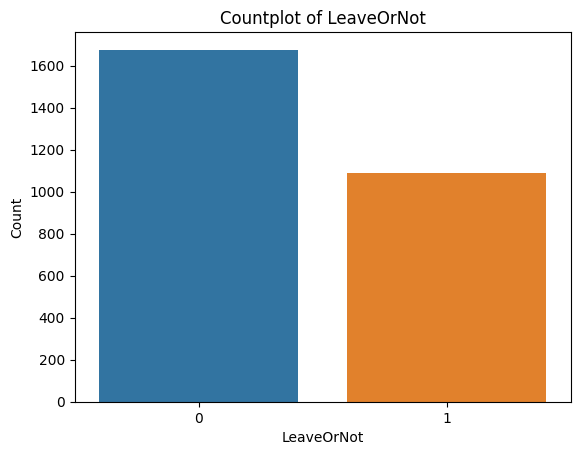

In [60]:
sns.countplot(x='LeaveOrNot', data=df)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Countplot of LeaveOrNot')
plt.show()

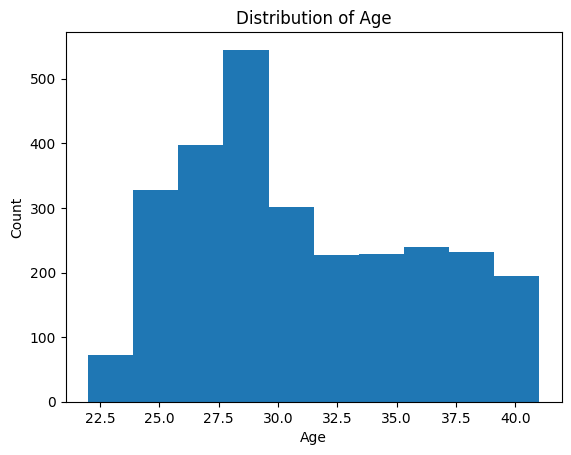

In [61]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

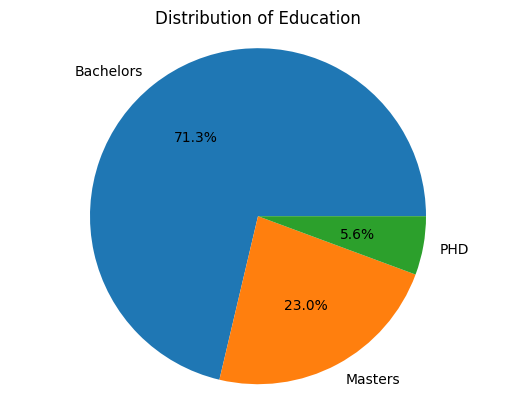

In [62]:
plt.pie(df['Education'].value_counts().values, labels= df['Education'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Education')
plt.axis('equal')
plt.show()

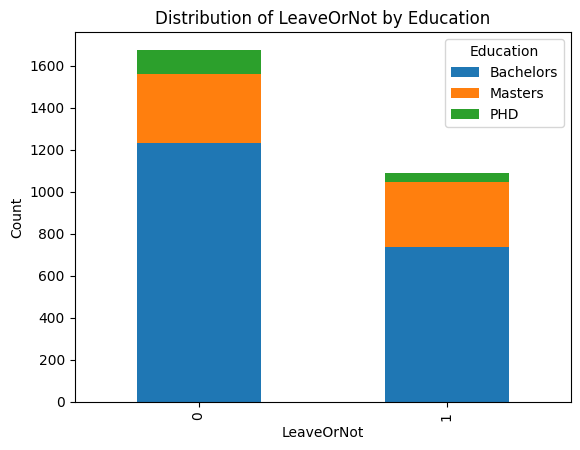

In [63]:
leave_education_counts = df.groupby(['LeaveOrNot', 'Education']).size().unstack()
leave_education_counts.plot(kind='bar', stacked=True)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot by Education')
plt.legend(title='Education')
plt.show()


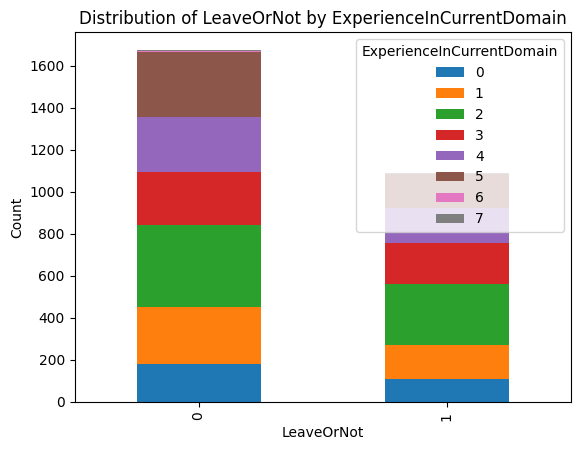

In [64]:
leave_education_counts = df.groupby(['LeaveOrNot', 'ExperienceInCurrentDomain']).size().unstack()
leave_education_counts.plot(kind='bar', stacked=True)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot by ExperienceInCurrentDomain')
plt.legend(title='ExperienceInCurrentDomain')
plt.show()


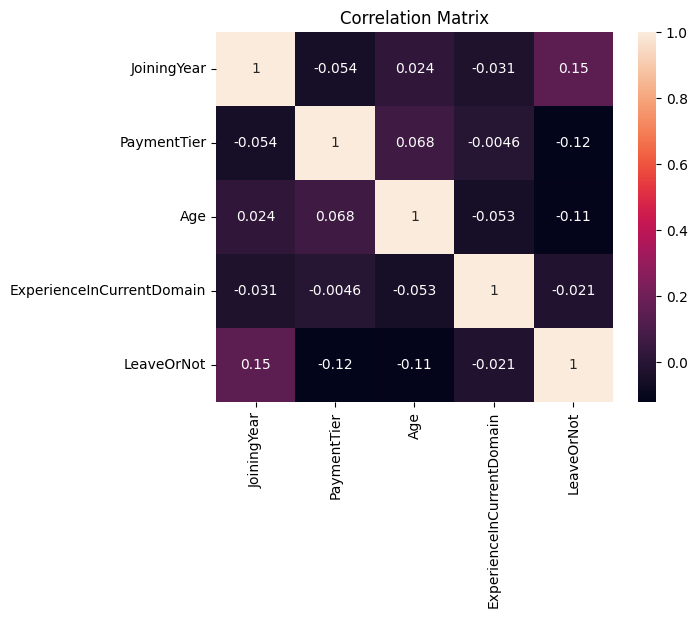

In [65]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [66]:
data = df.copy()

In [67]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype =='object':
        data[col]=le.fit_transform(data[col])

In [69]:
data['JoiningYear'] = le.fit_transform(data['JoiningYear'])

In [70]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
data['Age'] = mns.fit_transform(data[['Age']])

In [71]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,0.631579,1,0,0,0
1,0,1,2,1,0.315789,0,0,3,1
2,0,2,1,3,0.842105,0,0,2,0
3,1,4,0,3,0.263158,1,0,5,1
4,1,5,2,3,0.105263,1,1,2,1


In [72]:
df1 = data.copy()
df2 = data.copy()

In [73]:
df2 = df2.drop(columns=['EverBenched','ExperienceInCurrentDomain'])

In [74]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
over = SMOTE()
f1 = df1.iloc[:,:8]
t1 = df1.iloc[:,8]
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1676, 1: 1676})

In [75]:
df1 = pd.concat([f1,t1], axis=1)

In [76]:
over = SMOTE()
f2 = df2.iloc[:,:6]
t2 = df2.iloc[:,6]
f2, t2 = over.fit_resample(f2,t2)
Counter(t2)

Counter({0: 1676, 1: 1676})

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [78]:
X1 = df1.iloc[:, :8]
y1 = df1.iloc[:, 8]

In [79]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [80]:
rf_model = RandomForestClassifier()
rf_model.fit(X1_train, y1_train)
rf_predictions = rf_model.predict(X1_test)
rf_accuracy = accuracy_score(y1_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y1_test, rf_predictions))

Random Forest Accuracy: 0.7481371087928465
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       331
           1       0.76      0.74      0.75       340

    accuracy                           0.75       671
   macro avg       0.75      0.75      0.75       671
weighted avg       0.75      0.75      0.75       671



In [81]:
knn_model = KNeighborsClassifier()
knn_model.fit(X1_train, y1_train)
knn_predictions = knn_model.predict(X1_test)
knn_accuracy = accuracy_score(y1_test, knn_predictions)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y1_test, knn_predictions))


k-Nearest Neighbors Accuracy: 0.7496274217585693
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       331
           1       0.76      0.74      0.75       340

    accuracy                           0.75       671
   macro avg       0.75      0.75      0.75       671
weighted avg       0.75      0.75      0.75       671



In [82]:
lr_model = LogisticRegression()
lr_model.fit(X1_train, y1_train)
lr_predictions = lr_model.predict(X1_test)
lr_accuracy = accuracy_score(y1_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y1_test, lr_predictions))

Logistic Regression Accuracy: 0.6646795827123696
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       331
           1       0.67      0.66      0.67       340

    accuracy                           0.66       671
   macro avg       0.66      0.66      0.66       671
weighted avg       0.66      0.66      0.66       671



In [107]:
kMeans = KMeans(n_clusters=2)  # You can specify the number of clusters (k)
kMeans.fit(X1_train, y1_train)
kMeans_labels = kMeans.predict(X1_test)
kMeans_accuracy = accuracy_score(y1_test, kMeans_labels)
print("KMeans Accuracy (df1):", kMeans_labels)
print(classification_report(y1_test, kMeans_labels))

KMeans Accuracy (df1): [0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0

In [100]:
X2 = df2.iloc[:, :6]
y2 = df2.iloc[:, 6]


In [108]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [109]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(X2_train, y2_train)
rf_predictions2 = rf_model2.predict(X2_test)
rf_accuracy2 = accuracy_score(y2_test, rf_predictions2)
print("Random Forest Accuracy (df2):", rf_accuracy2)
print(classification_report(y2_test, rf_predictions2))

Random Forest Accuracy (df2): 0.7323688969258589
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       333
           1       0.69      0.59      0.64       220

    accuracy                           0.73       553
   macro avg       0.72      0.71      0.71       553
weighted avg       0.73      0.73      0.73       553



In [110]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X2_train, y2_train)
knn_predictions2 = knn_model2.predict(X2_test)
knn_accuracy2 = accuracy_score(y2_test, knn_predictions2)
print("k-Nearest Neighbors Accuracy (df2):", knn_accuracy2)
print(classification_report(y2_test, knn_predictions2))

k-Nearest Neighbors Accuracy (df2): 0.759493670886076
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       333
           1       0.75      0.60      0.66       220

    accuracy                           0.76       553
   macro avg       0.76      0.73      0.74       553
weighted avg       0.76      0.76      0.75       553



In [111]:
lr_model2 = LogisticRegression()
lr_model2.fit(X2_train, y2_train)
lr_predictions2 = lr_model2.predict(X2_test)
lr_accuracy2 = accuracy_score(y2_test, lr_predictions2)
print("Logistic Regression Accuracy (df2):", lr_accuracy2)
print(classification_report(y2_test, lr_predictions2))

Logistic Regression Accuracy (df2): 0.6763110307414105
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       333
           1       0.65      0.40      0.50       220

    accuracy                           0.68       553
   macro avg       0.67      0.63      0.63       553
weighted avg       0.67      0.68      0.66       553



In [112]:
kMeans = KMeans(n_clusters=2)  # You can specify the number of clusters (k)
kMeans.fit(X2_train, y2_train)
kMeans_labels = kMeans.predict(X2_test)
kMeans_accuracy2 = accuracy_score(y2_test, kMeans_labels)
print("KMeans Accuracy (df2):", kMeans_labels)
print(classification_report(y2_test, kMeans_labels))

KMeans Accuracy (df2): [1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1
 0

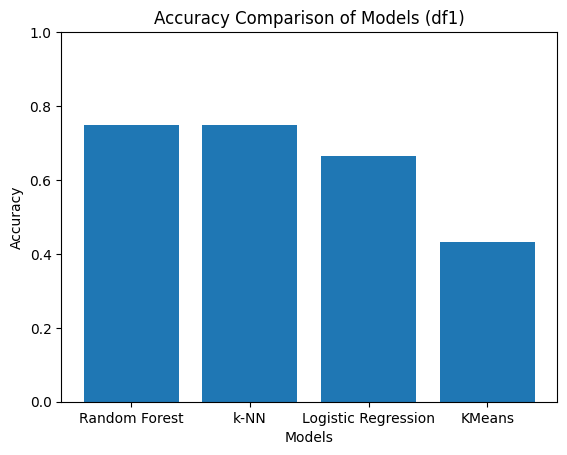

In [114]:
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy, kMeans_accuracy]

# Plotting the bar plot
models = ['Random Forest', 'k-NN', 'Logistic Regression', 'KMeans']
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models (df1)')
plt.ylim([0, 1])
plt.show()

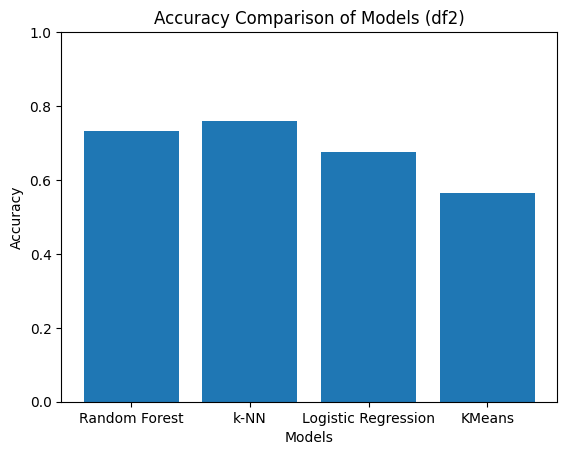

In [117]:
accuracies2 = [rf_accuracy2, knn_accuracy2, lr_accuracy2, kMeans_accuracy2]

# Plotting the bar plot for df2
plt.bar(models, accuracies2)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models (df2)')
plt.ylim([0, 1])
plt.show()


In [42]:
import joblib
m =KNeighborsClassifier()
m.fit(f2, t2)


KNeighborsClassifier()

In [43]:
joblib.dump(m, 'model.joblib')

['model.joblib']

In [44]:
loaded_model = joblib.load('model.joblib')

In [45]:
pred = loaded_model.predict([[0,2,1,3,0.842105,0]])

In [46]:
if pred ==0:
    print("Not Leave")
else:
    print("Leave")

Not Leave
